This notebook demonstrates the process of clustering numerical data using the **KMeans algorithm, Agglomerative Clustering and PCA with Kmeans** from the scikit-learn library and visualizing the results through a plots.
The notebook begins by loading the data and preprocessing it as necessary. It then applies the various different algorithm to cluster the wine data into a specified number of clusters. The notebook uses the matplotlib and seaborn library to create a plot that visualizes the relationship between two numerical columns. The plot provides insight into the clustering results and helps to understand the distribution of the data points within each cluster.
Notebook uses **Silhouette Score as a metric**, which used to calculate the goodness of a clustering technique. It provides a measure of how well-separated the clusters are in a clustering result. The score ranges from -1 to 1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.cluster import DBSCAN, KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('flare')
results= []

In [2]:
data = pd.read_csv('/content/drive/MyDrive/Wine Data/wine-clustering.csv')

# Data Exploration <a class="anchor"  id="Data Exploration"></a>

In [3]:
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [5]:
data.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [6]:
data.duplicated().any()

False

# Data Visualization <a class="anchor"  id="Data Visualization"></a>

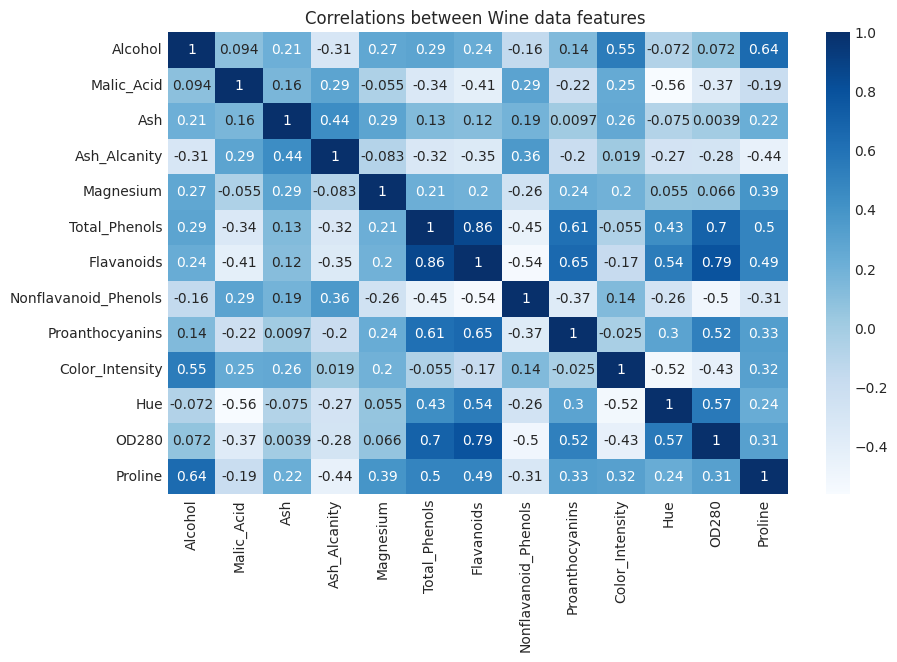

In [7]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(),annot=True,cmap='Blues')
plt.title('Correlations between Wine data features ')
plt.show()

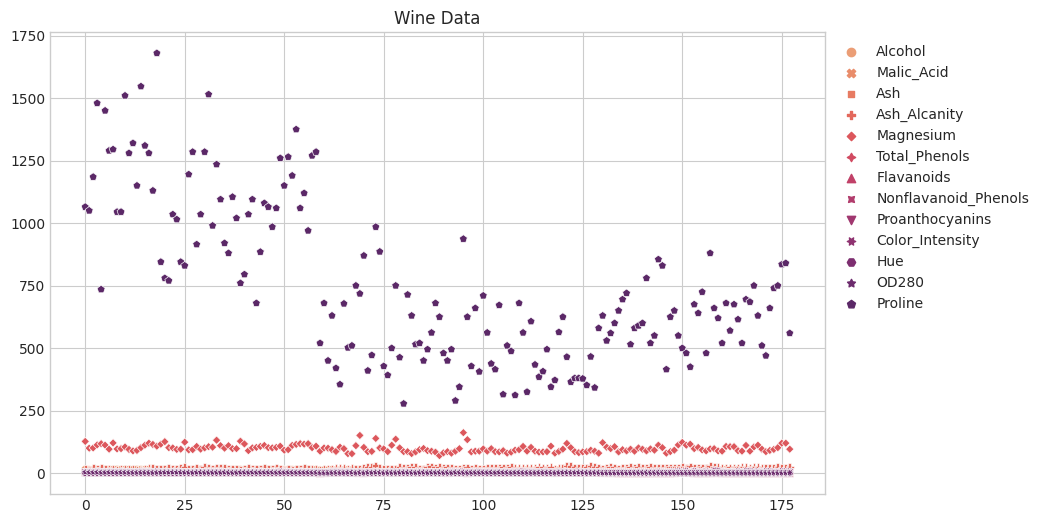

In [8]:
plt.figure(figsize=(10,6))
sns.scatterplot(data= data,palette='flare')
plt.title('Wine Data')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

# Data Standardization using Z - Score normlization  <a class="anchor"  id="Data Standardization"></a>

Data standardization, also known as data normalization, is a preprocessing step in which the features of a dataset are scaled or transformed to have a mean of 0 and a standard deviation of 1. Standardizing the data is important, especially when working with algorithms that are sensitive to the scale of the input features, such as K-Means, Support Vector Machines (SVM), and Principal Component Analysis (PCA).

In Wine data, data is not standardized. Proline feature values are all above 250, some feature values are very small. As some Algorithms are sensitive to scale of input features, we need to standardize data. There are several methods to normalization like min-max normalization, z-score normalization or mean normalization.
Here we used Z-score normalization also known as Standardization method.

In [9]:
scaler = StandardScaler()
X_standardized = scaler.fit_transform(data)
x_train, test = train_test_split(X_standardized, test_size=0.4,random_state=42 )
x_val, x_test = train_test_split(test, test_size= 0.5, random_state=42)

# K-means Clustering <a class="anchor"  id="K-means Clustering"></a>

K-Means clustering is a partitioning method that aims to partition a dataset into K clusters, where each data point belongs to the cluster with the nearest mean.


In [10]:
k_means = KMeans(n_clusters=3, n_init=5)

labels_train = k_means.fit_predict(x_train)
train_kmeans_avg = silhouette_score(x_train, labels_train)

labels_validation = k_means.predict(x_val)
val_kmeans_avg = silhouette_score(x_val, labels_validation)

labels_test = k_means.predict(x_test)
test_kmeans_avg = silhouette_score(x_test, labels_test)

results.append({'Model Name' : 'Kmeans',
                'Training Set ': train_kmeans_avg,
                'Validation Set' : val_kmeans_avg,
                 'Testing Set': test_kmeans_avg})


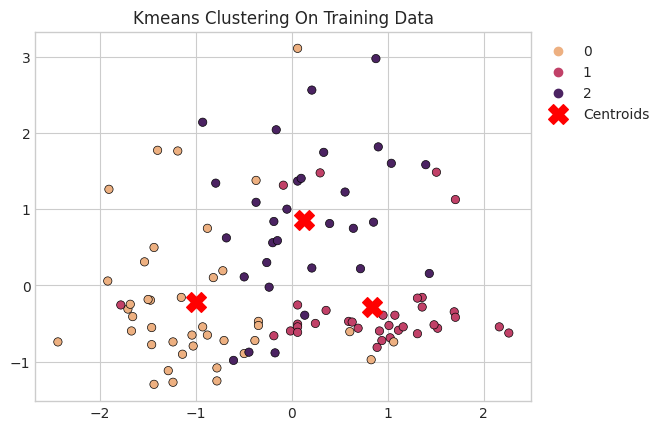

Silhouette Score on Training Set: 0.2808620526436533


In [11]:
sns.scatterplot(x=x_train[:,0], y= x_train[:,1], data= x_train, hue=labels_train,palette='flare',edgecolor='k')
plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('Kmeans Clustering On Training Data')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

print(f'Silhouette Score on Training Set: {train_kmeans_avg}')

# Agglomerative Clustering a hierarchical clustering algorithm <a class="anchor"  id="Agglomerative Clustering"></a>

Agglomerative Clustering is a hierarchical clustering algorithm that builds a hierarchy of clusters. The algorithm starts with each data point as a single cluster and successively merges the closest pairs of clusters until a single cluster containing all data points is formed. This hierarchical structure is often represented as a dendrogram.

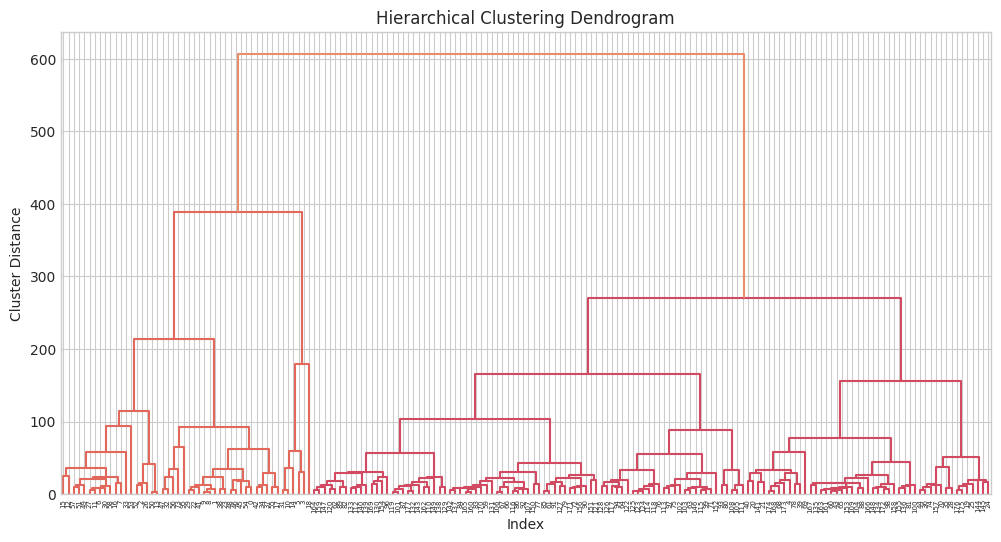

In [12]:
plt.figure(figsize=(12,6))
linked = linkage(data, method='centroid')
dendrogram(linked, orientation='top', distance_sort='descending')
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Index")
plt.ylabel("Cluster Distance")
plt.show()

In [13]:
model = AgglomerativeClustering(n_clusters=3)

labels_train_A = model.fit_predict(x_train)
silhouette_avg_train = silhouette_score(x_train, labels_train_A)

labels_validation_A = model.fit_predict(x_val)
silhouette_avg_val = silhouette_score(x_val, labels_validation_A)

labels_test_A = model.fit_predict(x_test)
silhouette_avg_test = silhouette_score(x_test, labels_test_A)

results.append({'Model Name' : 'Agglomerative Clustering',
                'Training Set ': silhouette_avg_train,
                'Validation Set' : silhouette_avg_val,
                 'Testing Set': silhouette_avg_test})

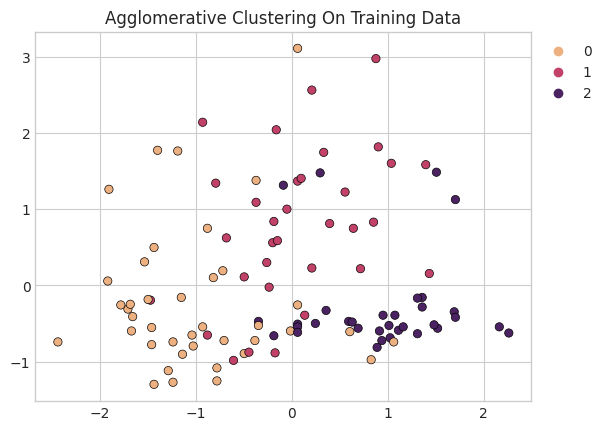

In [14]:
sns.scatterplot(x=x_train[:,0], y= x_train[:,1], data= x_train, hue=labels_train_A,palette='flare',edgecolor='k')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title('Agglomerative Clustering On Training Data')
plt.show()

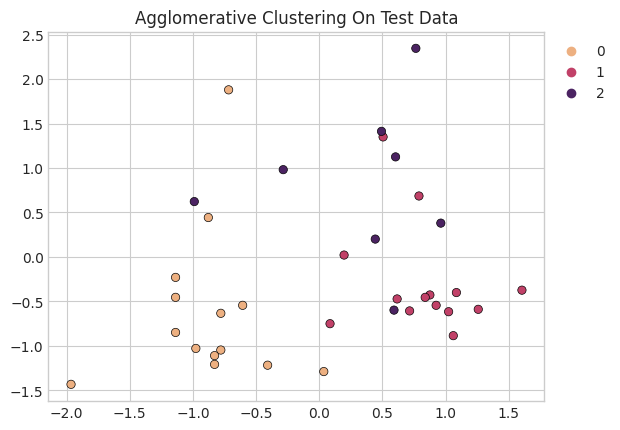

In [15]:
sns.scatterplot(x=x_test[:,0], y= x_test[:,1], data= x_test, hue=labels_test_A, palette='flare',edgecolor='k')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title('Agglomerative Clustering On Test Data')
plt.show()

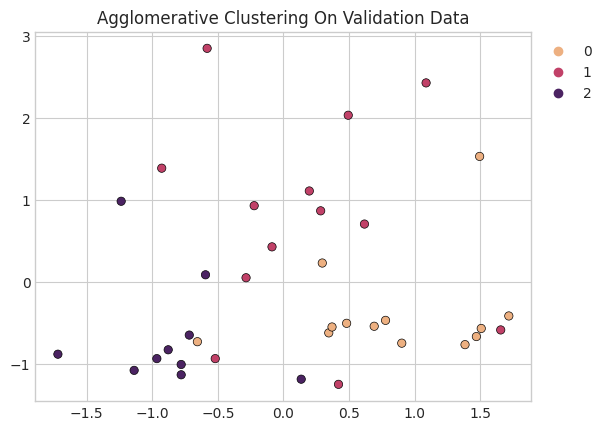

In [16]:
sns.scatterplot(x=x_val[:,0], y= x_val[:,1], data= x_val, hue=labels_validation_A,palette= 'flare',edgecolor='k')
plt.title('Agglomerative Clustering On Validation Data')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

# Principal Component Analysis with Kmeans <a class="anchor"  id="PCA with Kmeans"></a>

Principal Component Analysis (PCA) is a dimensionality reduction technique widely used in machine learning and data analysis. It transforms high-dimensional data into a lower-dimensional representation, capturing the most important information in the data. 

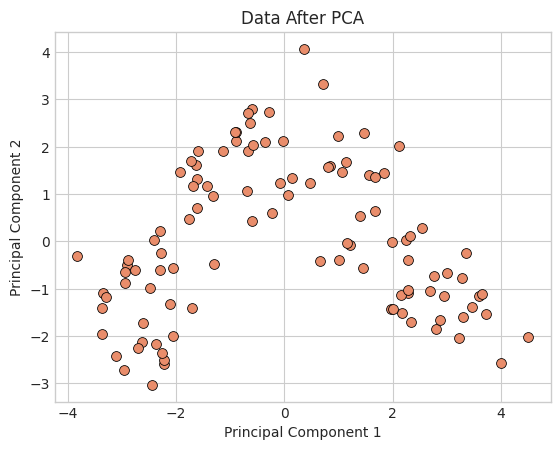

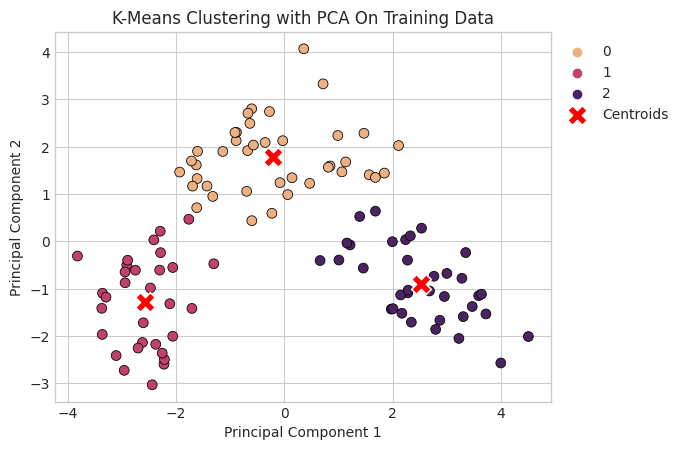

Silhouette train set Score: 0.5603726386000918


In [17]:
# Apply PCA to reduce dimensionality
pca = PCA(n_components=2)
x_train_pca = pca.fit_transform(x_train)
x_val_pca = pca.fit_transform(x_val)
x_test_pca = pca.fit_transform(x_test)

# Visualize the data after PCA
sns.scatterplot(x=x_train_pca[:, 0], y=x_train_pca[:, 1], data=x_train_pca, marker='o', s=50, edgecolor='k')
plt.title('Data After PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Apply K-Means clustering on the PCA-transformed data
k_means = KMeans(n_clusters=3, random_state=42,n_init=10)
labels = k_means.fit_predict(x_train_pca)
labels_val = k_means.predict(x_val_pca)
labels_test = k_means.predict(x_test_pca)

# Silhouette_score for train, val ,test sets
train_pca_avg = silhouette_score(x_train_pca, labels)
val_pca_avg = silhouette_score(x_val_pca, labels_val)
test_pca_avg = silhouette_score(x_test_pca, labels_test)

# Visualize the clustering result
sns.scatterplot(x= x_train_pca[:, 0], y=x_train_pca[:, 1], data=x_train_pca, hue=labels, marker='o', s=50,palette='flare',edgecolor='k')
sns.scatterplot(x= k_means.cluster_centers_[:, 0], y= k_means.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('K-Means Clustering with PCA On Training Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


print(f'Silhouette train set Score: {train_pca_avg}')



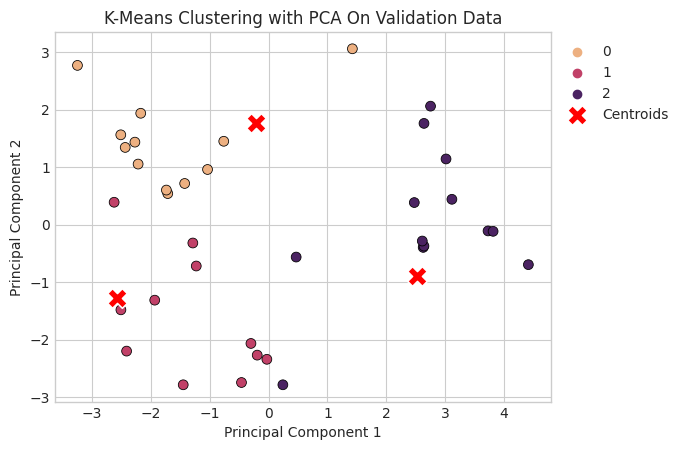

Silhouette Score on Validation Set: 0.45732291140211623


In [18]:
sns.scatterplot(x= x_val_pca[:, 0], y=x_val_pca[:, 1], data=x_val_pca, hue=labels_val, marker='o', s=50, edgecolor='k',palette='flare')
sns.scatterplot(x= k_means.cluster_centers_[:, 0], y= k_means.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('K-Means Clustering with PCA On Validation Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


print(f'Silhouette Score on Validation Set: {val_pca_avg}')

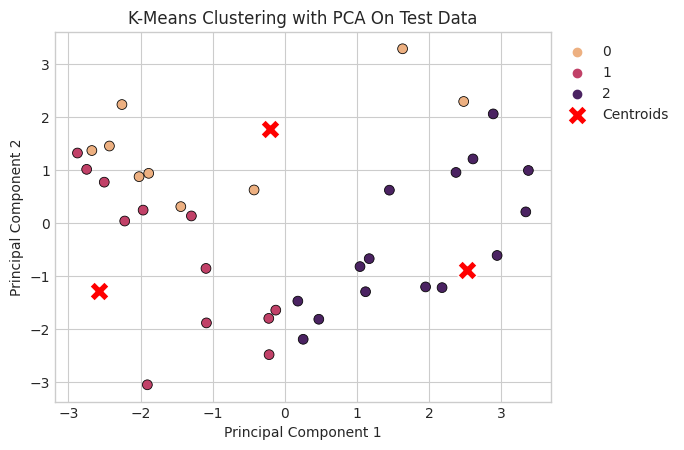

Silhouette Score on Validation Set: 0.20189294490586665


In [19]:
scatter = sns.scatterplot(x= x_test_pca[:, 0], y=x_test_pca[:, 1], data=x_test_pca, hue=labels_test, marker='o', s=50, edgecolor='k',palette='flare')
sns.scatterplot(x= k_means.cluster_centers_[:, 0], y= k_means.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')

plt.title('K-Means Clustering with PCA On Test Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

print(f'Silhouette Score on Validation Set: {test_pca_avg}')

In [20]:
results.append({'Model Name' : 'PCA with Kmeans',
                'Training Set ': train_pca_avg,
                'Validation Set' : val_pca_avg,
                 'Testing Set': test_pca_avg})

results_df = pd.DataFrame(results)

print('\033[1m' + '\nSilhouette Score for Models:' +'\033[0m')
display(results_df)


Silhouette Score for Models:


,Model Name,Training Set,Validation Set,Testing Set
0,Kmeans,0.280862,0.268975,0.291732
1,Agglomerative Clustering,0.275638,0.271731,0.291732
2,PCA with Kmeans,0.560373,0.457323,0.201893
